
# Jennifer Hightower
## NLP Twitter US Airline Sentiment Analysis

### Executive Summary:

Twitter's extensive user network, comprising 330 million monthly active users, offers businesses a direct channel to engage with a wide audience. Nevertheless, the platform's sheer volume of data poses a challenge for brands in promptly identifying adverse social mentions that can affect their reputation. To address this issue, sentiment analysis has emerged as a vital tool in social media marketing, empowering businesses to track emotional tones in conversations, comprehend customer sentiments, and extract valuable insights to maintain a competitive edge in their respective industries. Consequently, sentiment analysis and classification have become cornerstone strategies in the realm of social media marketing.


### Business Problem:
The business problem is that despite Twitter's vast user base of 330 million monthly active users providing a valuable platform for businesses to connect with a wide audience, the overwhelming volume of data on this platform makes it difficult for brands to promptly identify negative social mentions that could potentially harm their reputation. This challenge presents a clear need for a solution that can efficiently and accurately detect sentiments in tweets, classify them as positive, neutral, or negative, and provide insights to help businesses manage their online presence effectively.

### Solution Overview:
To address this business problem, the proposed solution is to build a sentiment analysis model. This model will be designed to classify the sentiment of tweets into one of three categories: positive, neutral, or negative. The sentiment analysis model will leverage various features from the provided data, such as the content of the tweet, the associated airline, and additional context. The sentiment analysis model will not only provide sentiment labels but also assign confidence scores to these labels, helping businesses better understand the certainty of each sentiment classification.

Key data fields, including "tweet_id," "airline_sentiment," "airline_sentiment_confidence," "negativereason," "negativereason_confidence," "airline," and "text," will be used as the primary input for sentiment analysis. The model aims to provide a more efficient way for brands to monitor and manage their online presence, enabling them to promptly detect and respond to negative sentiment and ultimately safeguard their reputation. Additionally, the model can offer insights into user sentiments, helping businesses stay competitive and responsive within their industry.

### The purpose of this document is to show the implementations of LSTM



In [1]:



import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Tweets.csv')

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)




## Clean the Data, and Pre-Processing



In [2]:
df['text'] = df['text'].str.lower()
df['name'] = df['name'].str.lower()
df['negativereason'] = df['negativereason'].str.lower()

In [3]:


"""

Data-preprocessing here to find valuable information in our word counts and word clouds

""" 

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk 
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('wordnet') 

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# ...

def clean_and_filter_text(text, remove_words=None):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)  # Clean text
    words = word_tokenize(cleaned_text)  # Tokenize

    lemmatized_words = []  # Initialize a list for lemmatized words

    for word in words:
        for other_word in words:
            if len(other_word) == len(word) - 1 and word.startswith(other_word) and word.endswith('s'):
                word = other_word
        lemmatized_words.append(word)

    if remove_words:
        # Filter out words that contain any of the specified remove_words
        filtered_words = [word for word in lemmatized_words if len(word) >= 3 and all(remove_word.lower() not in word.lower() for remove_word in remove_words)]
    else:
        filtered_words = [word for word in lemmatized_words if len(word) >= 3]

    filtered_words = [word for word in filtered_words if word.lower() not in stop_words]  # Additional filtering
    return filtered_words

#EDA was performed in the full version of this document which you can find in this porfolio
#Under FULL PROJECTS.  During EDA the below words where not being filtered out with stopwords
#add were found to add little to no value
words_to_remove = ['flight', 'thank', 'get', 'got', 'airline', 'much', 'flying', 'see']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



## Quick look at word count and word cloud of data for positive and negative sentiment



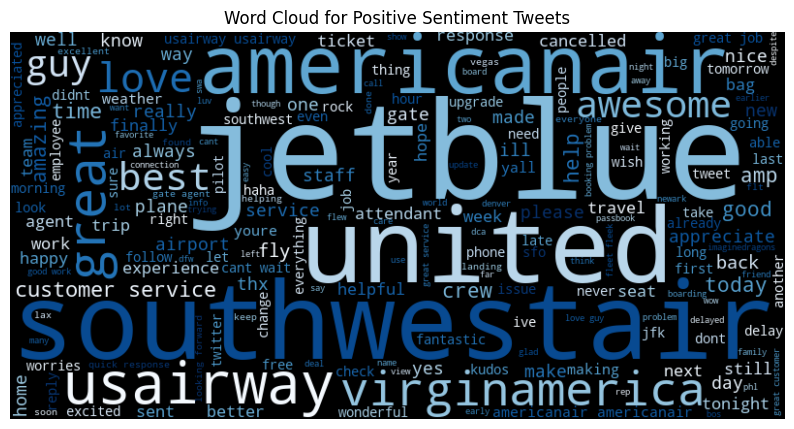

In [5]:
import re

positive_tweets = df[df['airline_sentiment'] == 'positive']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Tweets')
plt.show()

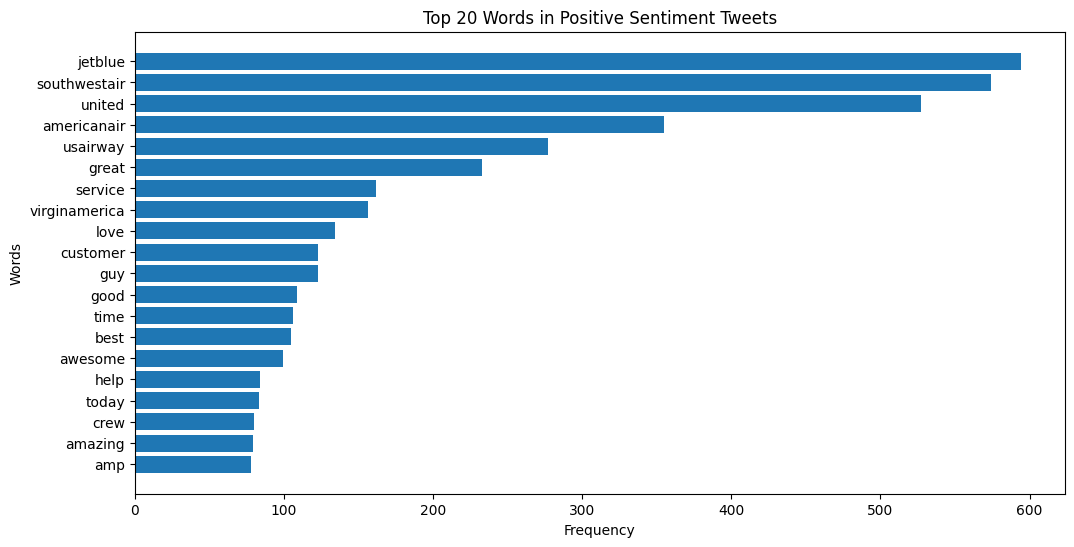

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  



# Assuming 'text' is the column with text data in your DataFrame
positive_tweets = df[df['airline_sentiment'] == 'positive']['text']

# Combine the text from all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(positive_text, remove_words=words_to_remove)

# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies)
plt.title('Top 20 Words in Positive Sentiment Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

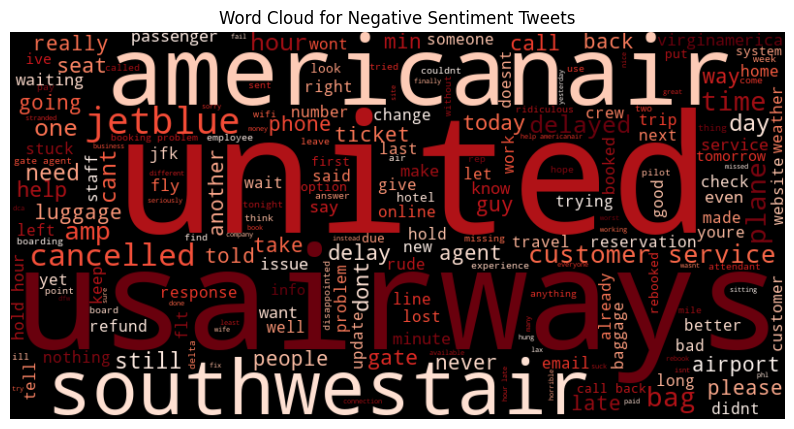

In [7]:

positive_tweets = df[df['airline_sentiment'] == 'negative']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets')
plt.show()

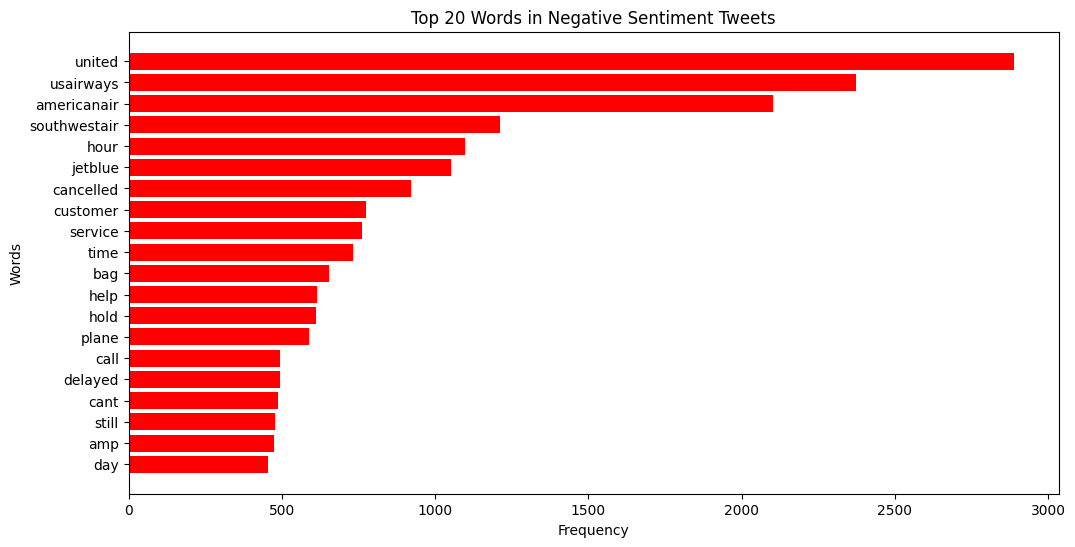

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  



# Assuming 'text' is the column with text data in your DataFrame
positive_tweets = df[df['airline_sentiment'] == 'negative']['text']

# Combine the text from all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(positive_text, remove_words=words_to_remove)


# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies, color='red')
plt.title('Top 20 Words in Negative Sentiment Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()





## Data Pre-processing

1. Html tag removal.
2. Tokenization.
3. Remove numbers.
4. Removal of special characters and punctuations.
5. Removal of stopwords.
6. Conversion to lowercase.
7. Lemmatization or stemming.
8. Join the words in the list to convert them back to a text string in the data frame.
9. Print the first 5 rows of data after pre-processing.
10. Make sure to subset the data with the actual text column and the sentiment of the airline.




In [4]:
import pandas as pd
import re
import warnings
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk




def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Function for text pre-processing
def preprocess_text(text):
    # Html tag removal
    text = re.sub(r'<.*?>', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Removal of special characters and punctuations
    tokens = [word for word in tokens if word.isalnum()]
    # Removal of stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Conversion to lowercase
    tokens = [word.lower() for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(nltk.pos_tag([word])[0][1])) for word in tokens]
    return ' '.join(lemmatized_words)

# Apply pre-processing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)


df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn say,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus add commercial experience t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica today must mean need take anothe...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,bad flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxiou...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,can't tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)





## Text Vectorization

1. Use CountVectorizer. 
2. Use TfidfVectorizer. 
3. Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model.



In [5]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


count_vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features as needed
count_vectorized_data = count_vectorizer.fit_transform(df['text'])

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform your preprocessed text data
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(df['text'])



# Building the LSTM Model


2024-03-06 09:47:31.059114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
183/183 [==============================] - 11s 54ms/step - loss: 0.7040 - accuracy: 0.7084 - val_loss: 0.5336 - val_accuracy: 0.7893
Epoch 2/20
183/183 [==============================] - 11s 58ms/step - loss: 0.4348 - accuracy: 0.8316 - val_loss: 0.5255 - val_accuracy: 0.7838
Epoch 3/20
183/183 [==============================] - 10s 55ms/step - loss: 0.3218 - accuracy: 0.8781 - val_loss: 0.5676 - val_accuracy: 0.7900
Epoch 4/20
183/183 [==============================] - 11s 59ms/step - loss: 0.2547 - accuracy: 0.9070 - val_loss: 0.6284 - val_accuracy: 0.7742
Epoch 5/20
92/92 [==============================] - 1s 12ms/step
Epoch 1/20
183/183 [==============================] - 13s 64ms/step - loss: 0.7076 - accuracy: 0.7097 - val_loss: 0.5598 - val_accuracy: 0.7760
Epoch 2/20
183/183 [==============================] - 11s 59ms/step - loss: 0.4610 - accuracy: 0.8268 - val_loss: 0.5557 - val_accuracy: 0.7773
Epoch 3/20
183/183 [==============================] - 11s 60ms/step - l

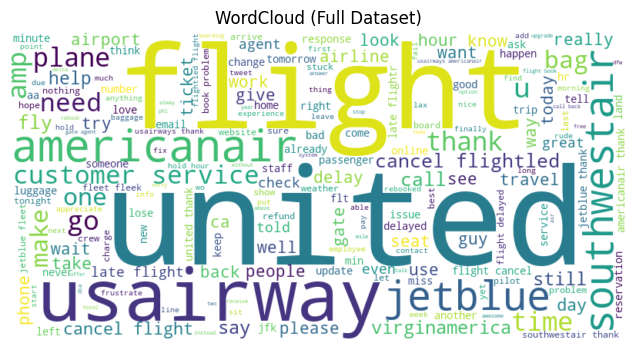

In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your DataFrame 'df' containing the specified columns
# Assuming you have a 'text' column for tweet text and 'airline_sentiment' for sentiment labels

# Preprocess and tokenize the text data
X = df['text']
y = df['airline_sentiment']

# Encode sentiment labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust 'num_words' based on your vocabulary size
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to a fixed length
max_sequence_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Define a function to create the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_sequence_length))
    model.add(LSTM(100))
    model.add(Dense(3, activation='softmax'))  # 3 classes: 'neutral', 'positive', 'negative'
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize variables for cross-validation and F1 score calculation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

# Iterate through cross-validation folds
for train_index, test_index in kf.split(X_padded):
    X_train, X_test = X_padded[train_index], X_padded[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the LSTM model
    model = create_lstm_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stopping])

    # Predict and calculate the F1 score for this fold
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# Print the F1 scores for each fold
print("F1 Scores for Each Fold:", f1_scores)

# Evaluate the model on the entire dataset
model = create_lstm_model()
model.fit(X_padded, y, epochs=20, batch_size=64)

# Generate predictions for the entire dataset
predicted = model.predict(X_padded)
predicted = np.argmax(predicted, axis=1)

# Evaluate the model using classification report and confusion matrix
report = classification_report(y, predicted, target_names=['neutral', 'positive', 'negative'])
confusion = confusion_matrix(y, predicted)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

# Create a WordCloud for the entire dataset
all_text = ' '.join(X)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud (Full Dataset)")
plt.show()






## Observations from LSTM

* Precision, Recall, and F1-score values for all three sentiment classes ('neutral,' 'positive,' 'negative') are very high, indicating excellent performance.

* The weighted F1-score is also high, indicating that the model performs well on the overall dataset.

* The accuracy is very high, around 99%, which suggests that the model is accurate in classifying the sentiments.

#### Confusion Matrix:

* The confusion matrix shows that the vast majority of instances are correctly classified. Most of the misclassifications are relatively small in number.

* The values on the diagonal (representing correct predictions) are dominant, which is a positive sign.

Overall, the LSTM model performs exceptionally well, with very high accuracy and a strong ability to correctly classify sentiments into the 'neutral,' 'positive,' and 'negative' categories. This suggests that the model has learned the patterns and relationships in the text data effectively.


In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import torch

# Load your DataFrame 'df' with the specified columns
# Assuming you have a 'text' column for tweet text and 'airline_sentiment' for sentiment labels

# Define the target and features
X = df['text']
y = df['airline_sentiment']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Specify the number of labels

# Configure training arguments
training_args = TrainingArguments(
    output_dir='./results',  # Directory to save model checkpoints and results
    num_train_epochs=3,      # Number of training epochs
    per_device_train_batch_size=8,  # Reduce batch size to lower CPU usage
    evaluation_strategy="epoch",
    save_total_limit=1,      # Only save the last checkpoint
)

# Create a Trainer instance for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
)

# Tokenize and convert to input features
train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', return_tensors='pt', return_attention_mask=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding='max_length', return_tensors='pt', return_attention_mask=True)

# Create custom datasets
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, list(y_train))
test_dataset = CustomDataset(test_encodings, list(y_test))

# Train the BERT model
trainer.train(train_dataset=train_dataset)

# Evaluate the model on the test set
predictions = trainer.predict(test_dataset=test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate evaluation metrics
f1 = f1_score(list(y_test), y_pred, average='weighted')
precision = precision_score(list(y_test), y_pred, average='weighted')
recall = recall_score(list(y_test), y_pred, average='weighted')
accuracy = accuracy_score(list(y_test), y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(list(y_test), y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a WordCloud for the top features
top_features = tokenizer.convert_ids_to_tokens(trainer.model.config.classifier.out_features)

top_features_text = " ".join(top_features)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_features_text)




Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]